### mnist-keras

In [1]:
from tensorflow.keras import datasets
from keras.utils import np_utils

# 데이터 준비
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()
print(y_train[:5])

#one hot encoding
y_train = np_utils.to_categorical(y_train)
print(y_train[:5])

y_test = np_utils.to_categorical(y_test)
L, W, H = X_train.shape

# -1 샘플의 개수
X_train = X_train.reshape(-1, W * H)
X_test = X_test.reshape(-1, W * H)

X_train = X_train / 255.0
X_test = X_test / 255.0

[5 0 4 1 9]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [2]:
from keras.layers import Dense, Dropout
from keras.models import Sequential

# 분류 DNN 모델 구현 함수
def make_model(input_number, layers, output_number):

    #모델 초기화
    model = Sequential()

    model.add(Dense(layers[0], activation='relu', input_shape=(input_number,)))
#                   out(128)        활성화                          입력    
    model.add(Dense(layers[1], activation='relu'))  
    model.add(Dense(layers[2], activation='relu'))      

    #드롭아웃 계층 Dropout(p) p라는 확률로
    #   출력 노드의 신호를 보내다 말다 함, 과적합 방지
    model.add(Dropout(0.2))
#                      20%off

    #출력층
    model.add(Dense(output_number, activation='softmax', name='output'))

    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model    

In [3]:
input_number = 784 #28x28

#은닉계층 3개, 은닉노드수 128개, 64개, 32개

hidden_layers = [128, 64, 32]
print(hidden_layers)

number_of_class = 10

output_number = number_of_class

#모델 생성
model = make_model(input_number, hidden_layers, output_number)

[128, 64, 32]


In [4]:
#모델 학습

hist = model.fit(X_train, y_train, epochs=5, batch_size=128, validation_split=0.2)
#                                                                 20% 조기학습 종료, 파라미터 최적화

Epoch 1/5
375/375 [==============================] - 4s 4ms/step - loss: 0.5312 - accuracy: 0.8408 - val_loss: 0.1801 - val_accuracy: 0.9480
Epoch 2/5
375/375 [==============================] - 1s 4ms/step - loss: 0.2035 - accuracy: 0.9419 - val_loss: 0.1405 - val_accuracy: 0.9581
Epoch 3/5
375/375 [==============================] - 1s 4ms/step - loss: 0.1428 - accuracy: 0.9600 - val_loss: 0.1153 - val_accuracy: 0.9678
Epoch 4/5
375/375 [==============================] - 2s 4ms/step - loss: 0.1058 - accuracy: 0.9697 - val_loss: 0.1009 - val_accuracy: 0.9700
Epoch 5/5
375/375 [==============================] - 2s 5ms/step - loss: 0.0862 - accuracy: 0.9754 - val_loss: 0.0988 - val_accuracy: 0.9720


In [5]:
#모델 평가

model.evaluate(X_test, y_test, batch_size=128)
#   [loss, accuracy]

79/79 [==============================] - 0s 3ms/step - loss: 0.0973 - accuracy: 0.9715


[0.09726352989673615, 0.9714999794960022]

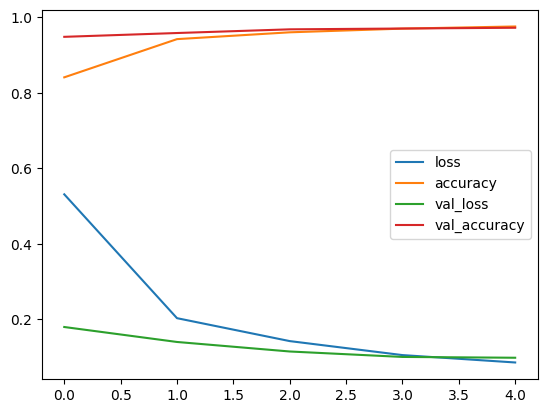

In [6]:
# 모델 학습 과정 표시

%matplotlib inline

import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['val_accuracy'])

plt.legend(['loss','accuracy','val_loss','val_accuracy'])

plt.show()